In [1]:
#The is a header kernel
from pandas_datareader import data
import matplotlib.pyplot as plt 
import pandas as pd
import datetime as dtt
import math
import numpy as np
from datetime import date as dt
from scipy import stats

class Date_price(): ##Store info for a single day
    def __init__ (self, date, price, Nth_day):
        self.date=date
        self.price=price
        self.Nth_day=Nth_day

class Date_price_list(): ##Store info for a period of day
    def __init__ (self, panel_data, start_date, end_date):
        self.len_period = len(panel_data['Open'])
        self.one_day_info=[]
        for x in range(0, self.len_period):
            tmp=Date_price(start_date+dtt.timedelta(days=x), panel_data['Open'][x], x)
            self.one_day_info.append(tmp)
        self.date_x=[]
        self.price_y=[]
        for i in range (0, len(self.one_day_info)):
            self.date_x.append(self.one_day_info[i].Nth_day)
            self.price_y.append(self.one_day_info[i].price)
        
class Graph_plot(): #Used to plot types of statistic graph transferred from default file
    def __init__ (self, data_source, func):
        pass
            
    def default(self):
        plt.plot(data_source.date_x, data_source.price_y)
    
    def liner_regression(self):
        plt.plot(func.graph_x_LR, func.graph_y_LR)

class index_func(): #Store types of functions to generate new figures from default graphs
    def __init__ (self, data_source):
        self.delta_y=[0]
        self.graph_x_LR=[]
        self.graph_y_LR=[]
    
    def Delta_y(self):
        for i in range (1, len(data_source.price_y)):
            self.delta_y.append(data_source.price_y[i]-data_source.price_y[i-1])
        
    def linear_regression(self, show_fitness_index=False, x=[], y=[]):
        if (len(x)==0):
            x=data_source.date_x
            y=data_source.price_y
        sum_numerator=0
        sum_denominator=0
        graph_x_mean=np.mean(x)
        graph_y_mean=np.mean(y)
        for i in range(0, len(x)):
            sum_numerator+=(x[i]-graph_x_mean)*(y[i]-graph_y_mean)
            sum_denominator+=(x[i]-graph_x_mean)**2
        b1=sum_numerator/sum_denominator
        b0=graph_y_mean-b1*graph_x_mean
        self.graph_x_LR=x
        self.graph_y_LR=[]
        for i in range (0, len(x)):
            self.graph_y_LR.append(b0+b1*self.graph_x_LR[i])
        if (show_fitness_index==True):
            SSR=0
            SSE=0
            SSTO=0
            for i in range(0, len(x)):
                SSR+=(self.graph_y_LR[i]-graph_y_mean)**2
                SSE+=(y[i]-self.graph_y_LR[i])**2
                SSTO+=(y[i]-graph_y_mean)**2
            r_square=np.minimum(1-SSE/SSTO, SSR/SSTO)
            print ("SSR =", SSR)
            print ("SSE =",SSE)
            print ("SSTO =",SSTO)
            if (self.graph_y_LR[1]<self.graph_y_LR[2]): r=r_square**0.5
            else: r=-r_square**0.5
            print ("Fitness index of the current linear regression =", r)
            print ("NOTICE: If Fitness Index is lower than 0.5, the graph would not be considered suitable to be analized by simple linear regression!")
        return r

In [2]:
#This is a kernel with purpose of creating dataframe from yahoo finance and keep the datastable (the database from yahoo finance can be sometimes disconnected)
start_date = dt(2016, 1, 2) #"2016-01-02" Please change the period from HERE!
end_date = dt(2016, 3, 1) #"2016-12-21" Please change the period from HERE!
panel_data = data.DataReader("AAPL", "yahoo", start_date, end_date)

SSR = 95.5032520331
SSE = 181.410338103
SSTO = 276.913590136
Fitness index of the current linear regression = -0.587268822234
NOTICE: If Fitness Index is lower than 0.5, the graph would not be considered suitable to be analized by simple linear regression!
SSR = 2.51284216792
SSE = 156.79512412
SSTO = 159.307966288
Fitness index of the current linear regression = 0.125592544385
NOTICE: If Fitness Index is lower than 0.5, the graph would not be considered suitable to be analized by simple linear regression!


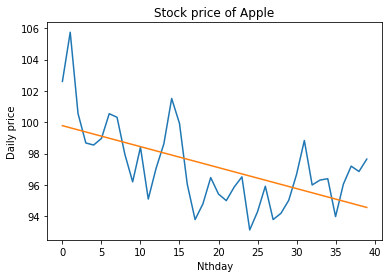

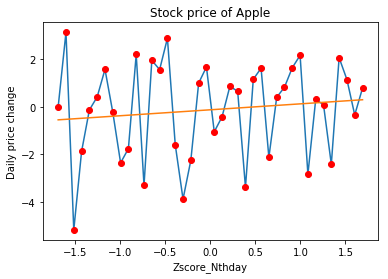

In [3]:
##This is a kernel of main function

data_source=Date_price_list(panel_data, start_date, end_date)
for x in range(0, data_source.len_period):
    tmp=Date_price(start_date+dtt.timedelta(days=x), panel_data['Open'][x], x)
    data_source.one_day_info.append(tmp)
    
func=index_func(data_source)

plt.figure(1)##

plt.xlabel("Nthday")
plt.ylabel("Daily price")
plt.title("Stock price of Apple")
painter=Graph_plot(data_source, func)
painter.default()

func.linear_regression(show_fitness_index=True)
painter.liner_regression()
##

plt.figure(2)##
plt.xlabel("Zscore_Nthday")
plt.ylabel("Daily price change")
plt.title("Stock price of Apple")
func.Delta_y()
plt.plot(stats.zscore(data_source.date_x), func.delta_y)
plt.plot(stats.zscore(data_source.date_x), func.delta_y, "ro")

func.linear_regression(show_fitness_index=True, x=stats.zscore(data_source.date_x), y=func.delta_y)
painter.liner_regression()
##

plt.show()


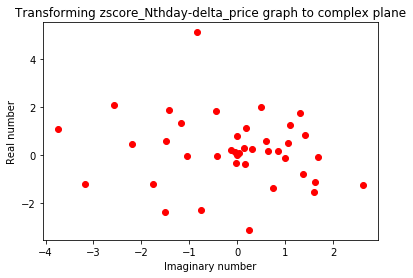

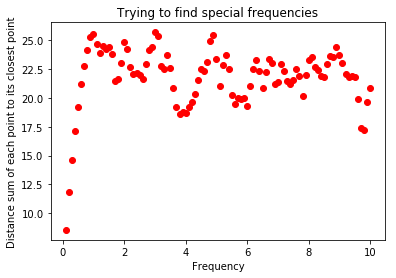

In [4]:
#The kernel is used for learning and research algorithm
def find_distance (x1, y1, x2, y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5
def sum_dis_closest_p (x, y):
    sum=0;
    for i in range (0, len(x)):
        min_dis=find_distance(x[0],y[0], x[1], y[1])
        for j in range (0, len(x)):
            if (j != i):
                if (find_distance(x[i], y[i], x[j], y[j])<min_dis):
                    min_dis=find_distance(x[i], y[i], x[j], y[j])
        sum+=min_dis;
    return sum;

fq=1
z_x=stats.zscore(data_source.date_x)
z_x_max=np.max(z_x)
z_x_min=np.min(z_x)
pd=(z_x_max-z_x_min)/fq
theta=z_x/pd*np.pi
radius=func.delta_y
tmp_x=radius*np.cos(theta)
tmp_y=radius*np.sin(theta)
plt.figure(1)
plt.plot(tmp_x, tmp_y, "ro")
plt.xlabel("Imaginary number")
plt.ylabel("Real number")
plt.title("Transforming zscore_Nthday-delta_price graph to complex plane")
plt.show()

plt.figure(2)
plt.xlabel("Frequency")
plt.ylabel("Distance sum of each point to its closest point")
plt.title("Trying to find special frequencies")
for fq in range (0,100):
    fq=fq/10+0.1
    z_x=stats.zscore(data_source.date_x)
    z_x_max=np.max(z_x)
    z_x_min=np.min(z_x)
    pd=(z_x_max-z_x_min)/fq
    ##Let the x, y be in complex plane x+yi
    theta=z_x/pd*np.pi
    radius=func.delta_y
    tmp_x=radius*np.cos(theta)
    tmp_y=radius*np.sin(theta)
    plt.plot(fq, sum_dis_closest_p(tmp_x, tmp_y), "ro") ##|r|*(cosA+sinAi)=x+yi
plt.show()
